# Lab 1 Evaluation

### Vatosoa Razafiniary 4IR SC
### Théo Fontana 4IR SC


In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

In [12]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees

import csv
import numpy as np
from utils import load_from_csv

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


In [18]:
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv") 
print (train_examples)
print(train_labels
)

[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[1 0 0 ... 1 0 1]


A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [3]:
treesParmeters = [
    #expected topologie and caracteristic
    {
        'splitter':'best',
        'max_depth': 2,
        'min_samples_leaf':  1
    },
    #expected topologie and caracteristic
    {
        'splitter':'random',
        'max_depth': 10,
        'min_samples_leaf':  100
    },
    #expected topologie and caracteristic
    {
        'splitter':'best',
        'max_depth': 5,
        'min_samples_leaf':  20
    },
    #expected topologie and caracteristic
    {
        'splitter':'best',
        'max_depth': 5,
        'min_samples_leaf':  5
    },
    #expected topologie and caracteristic
    {
        'splitter':'best',
        'max_depth': 100,
        'min_samples_leaf':  60
    #expected topologie and caracteristic
    },
    {
        'splitter':'best',
        'max_depth': 100,
        'min_samples_leaf':  60
    },
]
nbTree = len(treesParmeters)

Train a decision tree for each of the previous configurations on the full dataset

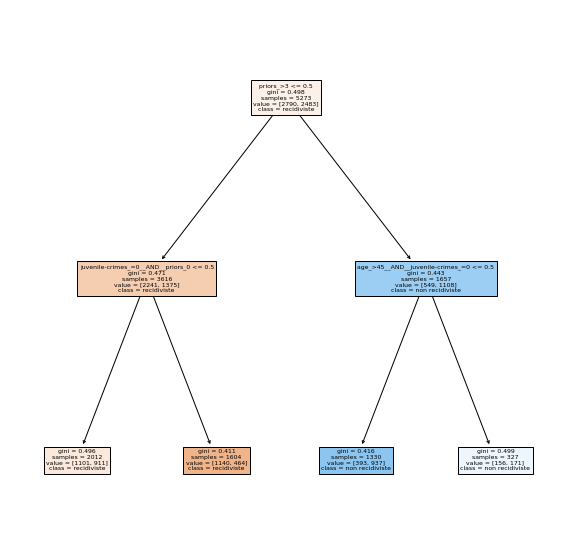

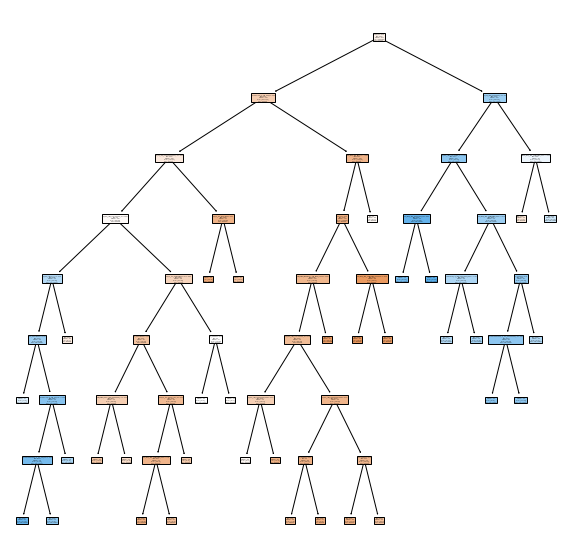

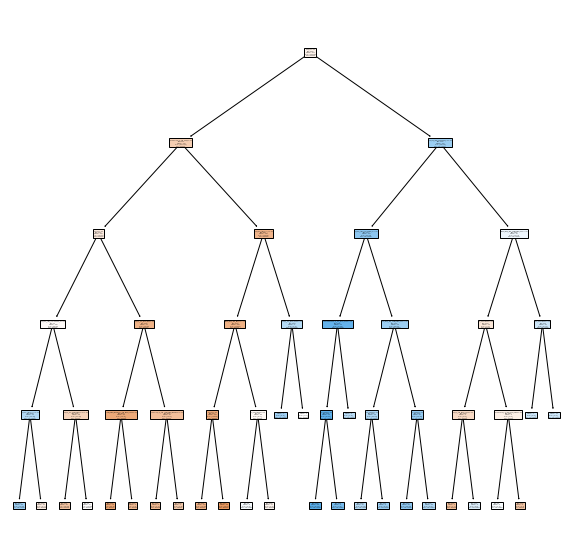

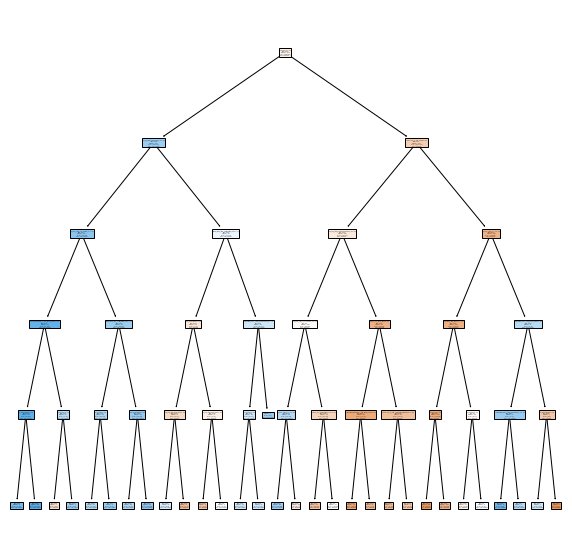

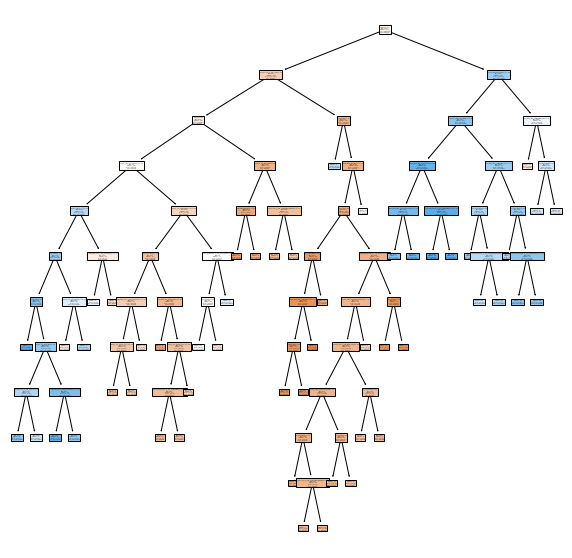

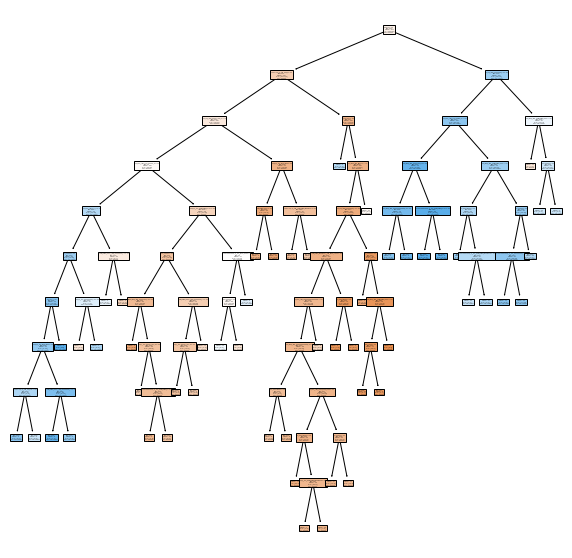

In [4]:
for i in range (nbTree) :
    parameters= treesParmeters[i]
    clf = tree.DecisionTreeClassifier(
        splitter=parameters['splitter'],
        max_depth =parameters['max_depth'],
        min_samples_leaf =parameters['min_samples_leaf']
    )
    clf = clf.fit(train_examples, train_labels)
    
    plt.figure(figsize=(10,10))
    tree.plot_tree(clf, 
                       feature_names= (features),
                       class_names= ("recidiviste", "non recidiviste"), 
                       filled=True)
    plt.show()

Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

In [5]:
# We only keep the two first topologies
treesParmeters = treesParmeters[:2]
nbTree = len(treesParmeters)

0.66 accuracy with a standard deviation of 0.02


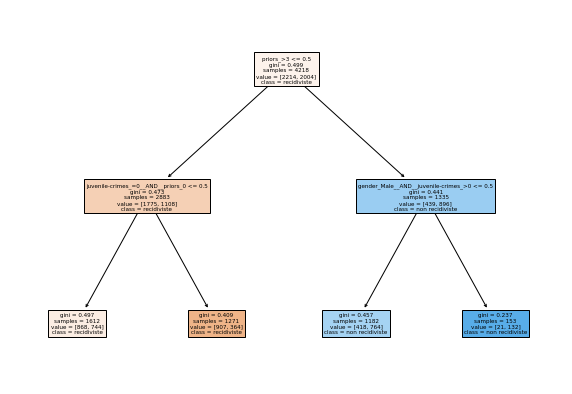

0.64 accuracy with a standard deviation of 0.01


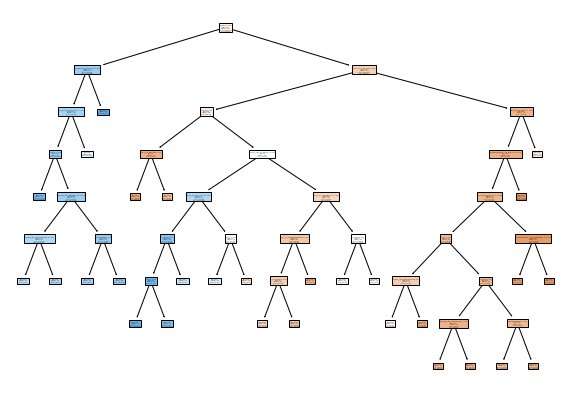

In [6]:
for i in range (nbTree) :
    parameters= treesParmeters[i]
    clf = tree.DecisionTreeClassifier(
        splitter=parameters['splitter'],
        max_depth =parameters['max_depth'],
        min_samples_leaf =parameters['min_samples_leaf']
    )
    X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=42)

    clf = clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=2)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    plt.figure(figsize=(10,7))
    tree.plot_tree(clf, 
                       feature_names= (features),
                       class_names= ("recidiviste", "non recidiviste"), 
                       filled=True)
    plt.show()

Propose an experimental study that shows the transition phase from underfitting to overfitting 

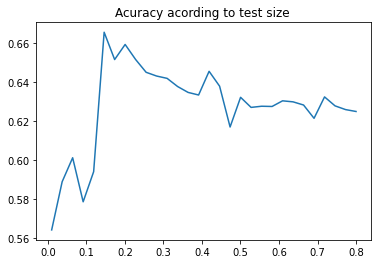

In [11]:
parameters= treesParmeters[0]
acuracy =[]
test_sizes=np.linspace(0.01,0.8,30)
for test_size in test_sizes :
    clf = tree.DecisionTreeClassifier(
        splitter=parameters['splitter'],
        max_depth =parameters['max_depth'],
        min_samples_leaf =parameters['min_samples_leaf']
    )
    X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=test_size, random_state=42)

    clf = clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=2)
    acuracy.append(scores.mean())
    #print(f"for a test size of {1/i} we have an accuracy of {scores.mean()} with a standard deviation of {scores.std()}")
plt.title('Acuracy acording to test size ')
plt.plot(test_sizes,acuracy)
plt.show()

### Remarks
* With small tests size, we have bad result because our graph is to close of our data 
    - **this is overfitting**
* With high tests size, our results start to be be lower because the graph is constructed with too few data
    - **this is underfitting**

Construct the confusion matrix on a particular good configuration (after explaining your choice)

In [13]:
parameters= treesParmeters[0]

clf = tree.DecisionTreeClassifier(
        splitter=parameters['splitter'],
        max_depth =parameters['max_depth'],
        min_samples_leaf =parameters['min_samples_leaf']
    )
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=test_size, random_state=42)

clf = clf.fit(X_train, y_train)
confusion_matrix(y_train, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1054, 4219]

Provide an evaluation of the fairness of the model based on the False Positive Rate